<a href="https://colab.research.google.com/github/Tim-R413/Deep-Learning-Handbook/blob/Testing-Layout/Section%202%20-%20Applied%20Math%20and%20ML/Module%202.1%20-%20Linear%20Algebra/Module_2_1_Linear_Algebra_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02.00 - Linear Algebra

Linear algebra is the branch of mathematics concerning linear equations and linear functions and their representations through matrices and vector spaces.

Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can perform with them, and how they can be useful.

If you are already familiar with linear algebra, feel free to skip this chapter but note that the implementation of certain functions are different between Tensorflow 1.0 and Tensorflow 2.0 so you should atleast skim through the code.

If you have had no exposure at all to linear algebra, this chapter will teach you enough to read this book.

In [ ]:
# Installs
!pip install --upgrade tf-nightly-2.0-preview

     |████████████████████████████████| 79.9MB 1.8MB/s 
     |████████████████████████████████| 3.0MB 49.7MB/s 
     |████████████████████████████████| 419kB 53.2MB/s 
     |████████████████████████████████| 61kB 29.2MB/s 


In [ ]:
# Imports
import tensorflow as tf
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"""
If you are running this notebook in Google colab, make sure to upload the helpers.py file to your 
session before running it, but if you are running this in Binder, then you 
don't have to worry about it. The helpers.py file will be in the notebook
folder in GitHub.

"""
from helpers import vector_plot, plot_transform

# 02.01 - Scalars, Vectors, Matrices and Tensors

__Scalars:__ are just a single number. For example temperature, which is denoted by just one number.


__Vectors:__ are an array of numbers. The numbers are arranged in order and we can identify each individual number by its index in that ordering. We can think of vectors as identifying points in space, with each element giving the coordinate along a different axis. In simple terms, a vector is an arrow representing a quantity that has both magnitude and direction wherein the length of the arrow represents the magnitude and the orientation tells you the direction. For example wind, which has a direction and magnitude.

__Matrices:__ A matrix is a 2D-array of numbers, so each element is identified by two indices instead of just one. If a real valued matrix $A$ has a height of *m* and a width of *n*, then we say that $A \in \mathbb{R}^{m \times n}$. We identify the elements of the matrix as $A_{m,n}$ where *m* represents the row and *n* represents the column.

![Scalars, Vectors, Matrices and Tensors](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0201a.png)

__Tensors:__ In the general case, are an array of numbers arranged on a regular grid with a variable number of axes is knows as a tensor. We identify the elements of a tensor $A$ at coordinates(*i, j, k*) by writing $A_{i, j, k}$. But to truly understand tensors, we need to expand the way we think of vectors as only arrows with a magnitude and direction. Remember that a vector can be represented by three components, namely the x, y and z components (basis vectors). If you have a pen and a paper, let's do a small experiment, place the pen vertically on the paper and slant it by some angle and now shine a light from top such that the shadow of the pen falls on the paper, this shadow, represents the x component of the vector "pen" and the height from the paper to the tip of the pen is the y component. Now, let's take these components to describe tensors, imagine, you are Indiana Jones or a treasure hunter and you are trapped in a cube and there are three arrows flying towards you from the three faces (to represent x, y, z axis) of the cube 😬, I know this will be the last thing you would think in such a situation but you can think of those three arrows as vectors pointing towards you from the three faces of the cube and you can represent those vectors (arrows) in x, y and z components, now that is a rank 2 tensor (matrix) with 9 components. Remember that this is a very very simple explanation of tensors. Following is a representation of a tensor:

![Tensors](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0201b.PNG)



We can add matrices to each other as long as they have the same shape, just by adding their corresponding elements:

$$\color{orange}{C = A + B \ where \ C_{i,j} = A_{i,j} + B_{i,j} \tag{1}}$$


In tensorflow a:

- Rank 0 Tensor is a Scalar
- Rank 1 Tensor is a Vector
- Rank 2 Tensor is a Matrix
- Rank 3 Tensor is a 3-Tensor
- Rank n Tensor is a n-Tensor

In [ ]:
# let's create a ones 3x3 rank 2 tensor
rank_2_tensor_A = tf.ones([3, 3], name='MatrixA')
print("3x3 Rank 2 Tensor A: \n{}\n".format(rank_2_tensor_A))

# let's manually create a 3x3 rank two tensor and specify the data type as float
rank_2_tensor_B = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name='MatrixB', dtype=tf.float32)
print("3x3 Rank 2 Tensor B: \n{}\n".format(rank_2_tensor_B))

# addition of the two tensors
rank_2_tensor_C = tf.add(rank_2_tensor_A, rank_2_tensor_B, name='MatrixC')
print("Rank 2 Tensor C with shape={} and elements: \n{}".format(rank_2_tensor_C.shape, rank_2_tensor_C))

3x3 Rank 2 Tensor A: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

3x3 Rank 2 Tensor B: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Rank 2 Tensor C with shape=(3, 3) and elements: 
[[ 2.  3.  4.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]


In [ ]:
# Let's see what happens if the shapes are not the same
two_by_three = tf.ones([2, 3])
try:
    incompatible_tensor = tf.add(two_by_three, rank_2_tensor_B)
except:
    print("""Incompatible shapes to add with two_by_three of shape {0} and 3x3 Rank 2 Tensor B of shape {1}
    """.format(two_by_three.shape, rank_2_tensor_B.shape))

Incompatible shapes to add with two_by_three of shape (2, 3) and 3x3 Rank 2 Tensor B of shape (3, 3)
    


We can also add a scalar to a matrix or multiply a matrix by a scalar, just by performing that operation on each element of a matrix:

$$\color{orange}{D = a \cdot B + c \ where  \ D_{i,j} = a \cdot B_{i,j} + c \tag{2}}$$

In [ ]:
# Create scalar a, c and Matrix B
rank_0_tensor_a = tf.constant(2, name="scalar_a", dtype=tf.float32)
rank_2_tensor_B = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name='MatrixB', dtype=tf.float32)
rank_0_tensor_c = tf.constant(3, name="scalar_c", dtype=tf.float32)

# multiplying aB
multiply_scalar = tf.multiply(rank_0_tensor_a, rank_2_tensor_B)
# adding aB + c
rank_2_tensor_D = tf.add(multiply_scalar, rank_0_tensor_c, name="MatrixD")

print("""Original Rank 2 Tensor B: \n{0} \n\nScalar a: {1}
Rank 2 Tensor for aB: \n{2} \n\nScalar c: {3} \nRank 2 Tensor D = aB + c: \n{4}
""".format(rank_2_tensor_B, rank_0_tensor_a, multiply_scalar, rank_0_tensor_c, rank_2_tensor_D))

Original Rank 2 Tensor B: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]] 

Scalar a: 2.0
Rank 2 Tensor for aB: 
[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]] 

Scalar c: 3.0 
Rank 2 Tensor D = aB + c: 
[[ 5.  7.  9.]
 [11. 13. 15.]
 [17. 19. 21.]]



One important operation on matrices is the __transpose__. The transpose of a matrix is the mirror image of the martrix across a diagonal line, called the __main diagonal__. We denote the transpose of a matrix $A$ as $A^\top$ and is defined as such: $(A^\top)_{i, j} = A_{j, i}$

In [ ]:
# Creating a Matrix E
rank_2_tensor_E = tf.constant([[1, 2, 3], [4, 5, 6]])
# Transposing Matrix E
transpose_E = tf.transpose(rank_2_tensor_E, name="transposeE")

print("""Rank 2 Tensor E of shape: {0} and elements: \n{1}\n
Transpose of Rank 2 Tensor E of shape: {2} and elements: \n{3}""".format(rank_2_tensor_E.shape, rank_2_tensor_E, 
                                                                         transpose_E.shape, transpose_E))

Rank 2 Tensor E of shape: (2, 3) and elements: 
[[1 2 3]
 [4 5 6]]

Transpose of Rank 2 Tensor E of shape: (3, 2) and elements: 
[[1 4]
 [2 5]
 [3 6]]


In deep learning we allow the addition of matrix and a vector, yielding another matrix where $C_{i, j} = A_{i, j} + b_{j}$. In other words, the vector $b$ is added to each row of the matrix. This implicit copying of $b$ to many locations is called __broadcasting__

In [ ]:
# Creating a vector b
rank_1_tensor_b = tf.constant([[4.], [5.], [6.]])
# Broadcasting a vector b to a matrix A such that it yields a matrix F = A + b
rank_2_tensor_F = tf.add(rank_2_tensor_A, rank_1_tensor_b, name="broadcastF")

print("""Rank 2 tensor A: \n{0}\n \nRank 1 Tensor b: \n{1} 
\nRank 2 tensor F = A + b:\n{2}""".format(rank_2_tensor_A, rank_1_tensor_b, rank_2_tensor_F))

Rank 2 tensor A: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
 
Rank 1 Tensor b: 
[[4.]
 [5.]
 [6.]] 

Rank 2 tensor F = A + b:
[[5. 5. 5.]
 [6. 6. 6.]
 [7. 7. 7.]]


# 02.02 - Multiplying Matrices and Vectors

To define the matrix product of matrices $A \ \text{and} \ B, \ A$ must have the same number of columns as $B$. If $A$ is of shape *m x n* and $B$ is of shape *n x p*, then $C$ is of shape *m x p*.

$$\color{orange}{C_{i, j} = \displaystyle\sum_k A_{i, k} B_{k, j} \tag{3}}$$

If you do not recall how matrix multiplication is performed, take a look at:

![Multiplying Matrices](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0202a.jpg)

In [ ]:
# Matrix A and B with shapes (2, 3) and (3, 4)
mmv_matrix_A = tf.ones([2, 3], name="matrix_A")
mmv_matrix_B = tf.constant([[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]], name="matrix_B", dtype=tf.float32)

# Matrix Multiplication: C = AB with C shape (2, 4)
matrix_multiply_C = tf.matmul(mmv_matrix_A, mmv_matrix_B, name="matrix_multiply_C")

print("""Matrix A: shape {0} \nelements: \n{1} \n\nMatrix B: shape {2} \nelements: \n{3}
\nMatrix C: shape {4} \nelements: \n{5}""".format(mmv_matrix_A.shape, mmv_matrix_A, mmv_matrix_B.shape, 
                                                  mmv_matrix_B, matrix_multiply_C.shape, matrix_multiply_C))

Matrix A: shape (2, 3) 
elements: 
[[1. 1. 1.]
 [1. 1. 1.]] 

Matrix B: shape (3, 4) 
elements: 
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]

Matrix C: shape (2, 4) 
elements: 
[[ 3.  6.  9. 12.]
 [ 3.  6.  9. 12.]]


To get a matrix containing the product of the individual elements, we use __element wise product__ or __Hadamard product__ and is denoted as $A \odot B$.


In [ ]:
"""
Note that we use multiply to do element wise matrix multiplication and matmul
to do matrix multiplication
"""
# Creating new Matrix A and B with shapes (3, 3)
element_matrix_A = tf.ones([3, 3], name="element_matrix_A")
element_matrix_B = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name="element_matrix_B", dtype=tf.float32)

# Element wise multiplication of Matrix A and B
element_wise_C = tf.multiply(element_matrix_A, element_matrix_B, name="element_wise_C")

print("""Matrix A: shape {0} \nelements: \n{1} \n\nMatrix A: shape {2} \nelements: \n{3}\n
Matrix C: shape {4} \nelements: \n{5}""".format(element_matrix_A.shape, element_matrix_A, element_matrix_B.shape, 
                                                element_matrix_B, element_wise_C.shape, element_wise_C))

Matrix A: shape (3, 3) 
elements: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

Matrix A: shape (3, 3) 
elements: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Matrix C: shape (3, 3) 
elements: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


To compute the dot product between $A$ and $B$ we compute $C_{i, j}$ as the dot product between row *i* of $A$ and column *j* of $B$.

![Dot Product](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0202b.jpg)

In [ ]:
# Creating Matrix A and B with shapes (3, 3)
dot_matrix_A = tf.ones([3, 3], name="dot_matrix_A")
dot_matrix_B = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name="dot_matrix_B", dtype=tf.float32)

# Dot product of A and B
dot_product_C = tf.tensordot(dot_matrix_A, dot_matrix_B, axes=1, name="dot_product_C")

print("""Matrix A: shape {0} \nelements: \n{1} \n\nMatrix B: shape {2} \nelements: \n{3}\n
Matrix C: shape {4} \nelements: \n{5}""".format(dot_matrix_A.shape, dot_matrix_A, dot_matrix_B.shape, 
                                                dot_matrix_B, dot_product_C.shape, dot_product_C))

Matrix A: shape (3, 3) 
elements: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

Matrix B: shape (3, 3) 
elements: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Matrix C: shape (3, 3) 
elements: 
[[12. 15. 18.]
 [12. 15. 18.]
 [12. 15. 18.]]



Some properties of matrix multiplication (Distributive property):

$$\color{orange}{A(B +C) = AB + AC \tag{4}}$$

In [ ]:
# Common Matrices to check all the matrix Properties
matrix_A = tf.constant([[1, 2], [3, 4]], name="matrix_a")
matrix_B = tf.constant([[5, 6], [7, 8]], name="matrix_b")
matrix_C = tf.constant([[9, 1], [2, 3]], name="matrix_c")

In [ ]:
# Distributive Property
print("Matrix A: \n{} \n\nMatrix B: \n{} \n\nMatrix C: \n{}\n".format(matrix_A, matrix_B, matrix_C))

# AB + AC
distributive_RHS = tf.add(tf.matmul(matrix_A, matrix_B), tf.matmul(matrix_A, matrix_C), name="RHS")

# A(B+C)
distributive_LHS = tf.matmul(matrix_A, (tf.add(matrix_B, matrix_C)), name="LHS")

"""
Following is another way a conditional statement can be implemented from tensorflow
This might not seem very useful now but I want to introduce it here so you can
figure out how it works for a simple example.
"""
# To compare each element in the matrix, you need to reduce it first and check if it's equal
predictor = tf.reduce_all(tf.equal(distributive_RHS, distributive_LHS))

# condition to act on if predictor is True
def true_print(): print("""Distributive property is valid
RHS: AB + AC: \n{} \n\nLHS: A(B+C): \n{}""".format(distributive_RHS, distributive_LHS))
    
# condition to act on if predictor is False    
def false_print(): print("""You Broke the Distributive Property of Matrix
RHS: AB + AC: \n{} \n\nis NOT Equal to LHS: A(B+C): \n{}""".format(distributive_RHS, distributive_LHS))
    
tf.cond(predictor, true_print, false_print)

Matrix A: 
[[1 2]
 [3 4]] 

Matrix B: 
[[5 6]
 [7 8]] 

Matrix C: 
[[9 1]
 [2 3]]

Distributive property is valid
RHS: AB + AC: 
[[32 29]
 [78 65]] 

LHS: A(B+C): 
[[32 29]
 [78 65]]


Some properties of matrix multiplication (Associative property):

$$\color{orange}{A(BC) = (AB)C \tag{5}}$$

In [ ]:
# Associative property
print("Matrix A: \n{} \n\nMatrix B: \n{} \n\nMatrix C: \n{}\n".format(matrix_A, matrix_B, matrix_C))

# (AB)C
associative_RHS = tf.matmul(tf.matmul(matrix_A, matrix_B), matrix_C)

# A(BC)
associative_LHS = tf.matmul(matrix_A, tf.matmul(matrix_B, matrix_C))

# To compare each element in the matrix, you need to reduce it first and check if it's equal
predictor = tf.reduce_all(tf.equal(associative_RHS, associative_LHS))

# condition to act on if predictor is True
def true_print(): print("""Associative property is valid
RHS: (AB)C: \n{} \n\nLHS: A(BC): \n{}""".format(associative_RHS, associative_LHS))

# condition to act on if predictor is False    
def false_print(): print("""You Broke the Associative Property of Matrix
RHS: (AB)C: \n{} \n\nLHS: A(BC): \n{}""".format(associative_RHS, associative_LHS))
    
tf.cond(predictor, true_print, false_print)

Matrix A: 
[[1 2]
 [3 4]] 

Matrix B: 
[[5 6]
 [7 8]] 

Matrix C: 
[[9 1]
 [2 3]]

Associative property is valid
RHS: (AB)C: 
[[215  85]
 [487 193]] 

LHS: A(BC): 
[[215  85]
 [487 193]]


Some properties of matrix multiplication (Matrix multiplication is not commutative):

$$\color{orange}{AB \neq BA \tag{6}}$$ 

In [ ]:
# Matrix multiplication is not commutative
print("Matrix A: \n{} \n\nMatrix B: \n{}\n".format(matrix_A, matrix_B))

# Matrix A times B
commutative_RHS = tf.matmul(matrix_A, matrix_B)

# Matrix B times A
commutative_LHS = tf.matmul(matrix_B, matrix_A)

predictor = tf.logical_not(tf.reduce_all(tf.equal(commutative_RHS, commutative_LHS)))
def true_print(): print("""Matrix Multiplication is not commutative
RHS: (AB): \n{} \n\nLHS: (BA): \n{}""".format(commutative_RHS, commutative_LHS))

def false_print(): print("""You made Matrix Multiplication commutative
RHS: (AB): \n{} \n\nLHS: (BA): \n{}""".format(commutative_RHS, commutative_LHS))
    
tf.cond(predictor, true_print, false_print)

Matrix A: 
[[1 2]
 [3 4]] 

Matrix B: 
[[5 6]
 [7 8]]

Matrix Multiplication is not commutative
RHS: (AB): 
[[19 22]
 [43 50]] 

LHS: (BA): 
[[23 34]
 [31 46]]


Some properties of matrix multiplication (Transpose):

$$\color{orange}{(AB)^\top = B^{\top} A^{\top} \tag{7}}$$

In [ ]:
# Transpose of a matrix
print("Matrix A: \n{} \n\nMatrix B: \n{}\n".format(matrix_A, matrix_B))

# Tensorflow transpose function
transpose_RHS = tf.transpose(tf.matmul(matrix_A, matrix_B))

# If you are doing matrix multiplication tf.matmul has a parameter to take the tranpose and then matrix multiply
transpose_LHS = tf.matmul(matrix_B, matrix_A, transpose_a=True, transpose_b=True)
    
predictor = tf.reduce_all(tf.equal(transpose_RHS, transpose_LHS))
def true_print(): print("""Transpose property is valid
RHS: (AB):^T \n{} \n\nLHS: (B^T A^T): \n{}""".format(transpose_RHS, transpose_LHS))

def false_print(): print("""You Broke the Transpose Property of Matrix
RHS: (AB):^T \n{} \n\nLHS: (B^T A^T): \n{}""".format(transpose_RHS, transpose_LHS))
    
tf.cond(predictor, true_print, false_print)

Matrix A: 
[[1 2]
 [3 4]] 

Matrix B: 
[[5 6]
 [7 8]]

Transpose property is valid
RHS: (AB):^T 
[[19 43]
 [22 50]] 

LHS: (B^T A^T): 
[[19 43]
 [22 50]]


# 02.03 - Identity and Inverse Matrices

Linear algebra offers a powerful tool called __matrix inversion__ that enables us to analytically solve $Ax = b$ for many values of $A$.

To describe matrix inversion, we first need to define the concept of an __identity matrix__. An identity matrix is a matrix that does not change any vector when we multiply that vector by that matrix. 

Such that:

$$\color{orange}{I_n \in \mathbb{R}^{n \times n} \ \text{and} \ \forall x \in \mathbb{R}^n, I_n x = x  \tag{8}}$$

The structure of the identity matrix is simple: all the entries along the main diagonal are 1, while all the other entries are zero.

In [ ]:
# let's create a identity matrix I
identity_matrix_I = tf.eye(3, 3, dtype=tf.float32, name='IdentityMatrixI')
print("Identity matrix I: \n{}\n".format(identity_matrix_I))

# let's create a 3x1 vector x
iim_vector_x = tf.constant([[4], [5], [6]], name='Vector_x', dtype=tf.float32)
print("Vector x: \n{}\n".format(iim_vector_x))

# Ix will result in x
iim_matrix_C = tf.matmul(identity_matrix_I, iim_vector_x, name='MatrixC')
print("Matrix C from Ix: \n{}".format(iim_matrix_C))

Identity matrix I: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Vector x: 
[[4.]
 [5.]
 [6.]]

Matrix C from Ix: 
[[4.]
 [5.]
 [6.]]


The __matrix inverse__ of $A$ is denoted as $A^{-1}$, and it is defined as the matrix such that:

$$\color{orange}{A^{-1} A = I_n \tag{9}}$$

In [ ]:
iim_matrix_A = tf.constant([[2, 3], [2, 2]], name='MatrixA', dtype=tf.float32)

try:
    # Tensorflow function to take the inverse
    inverse_matrix_A = tf.linalg.inv(iim_matrix_A)
    
    # Creating a identity matrix using tf.eye
    identity_matrix = tf.eye(2, 2, dtype=tf.float32, name="identity")

    iim_RHS = identity_matrix
    iim_LHS = tf.matmul(inverse_matrix_A, iim_matrix_A, name="LHS")
    
    predictor = tf.reduce_all(tf.equal(iim_RHS, iim_LHS))
    def true_print(): print("""A^-1 times A equals the Identity Matrix
Matrix A: \n{0} \n\nInverse of Matrix A: \n{1} \n\nRHS: I: \n{2} \n\nLHS: A^(-1) A: \n{3}""".format(iim_matrix_A,
                                                                                                    inverse_matrix_A,
                                                                                                    iim_RHS, 
                                                                                                    iim_LHS))
    def false_print(): print("Condition Failed")
    tf.cond(predictor, true_print, false_print)
    
except:
    print("""A^-1 doesnt exist
    Matrix A: \n{} \n\nInverse of Matrix A: \n{} \n\nRHS: I: \n{} 
    \nLHS: (A^(-1) A): \n{}""".format(iim_matrix_A, inverse_matrix_A, iim_RHS, iim_LHS))

A^-1 times A equals the Identity Matrix
Matrix A: 
[[2. 3.]
 [2. 2.]] 

Inverse of Matrix A: 
[[-1.   1.5]
 [ 1.  -1. ]] 

RHS: I: 
[[1. 0.]
 [0. 1.]] 

LHS: A^(-1) A: 
[[1. 0.]
 [0. 1.]]


If you try different values for Matrix A, you will see that, not all $A$ has an inverse and we will discuss the conditions for the existence of $A^{-1}$ in the following section.

We can then solve the equation $Ax = b$ as:

$$
\color{Orange}{A^{-1} Ax = A^{-1} b} \\
\color{Orange}{I_n x = A^{-1} b} \\
\color{Orange}{x  =A^{-1} b \tag{10}}
$$

This process depends on it being possible to find $A^{-1}$. 

We can calculate the inverse of a matrix by:

![Matrix Inverse](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0203a.PNG)

Lets see how we can solve a simple linear equation: 2x + 3y = 6 and 4x + 9y = 15

In [ ]:
# The above system of equation can be written in the matrix format as:
sys_matrix_A = tf.constant([[2, 3], [4, 9]], dtype=tf.float32)
sys_vector_B = tf.constant([[6], [15]], dtype=tf.float32)
print("Matrix A: \n{} \n\nVector B: \n{}\n".format(sys_matrix_A, sys_vector_B))

# now to solve for x: x = A^(-1)b
sys_x = tf.matmul(tf.linalg.inv(sys_matrix_A), sys_vector_B)
print("Vector x is: \n{} \nWhere x = {} and y = {}".format(sys_x, sys_x[0], sys_x[1]))

Matrix A: 
[[2. 3.]
 [4. 9.]] 

Vector B: 
[[ 6.]
 [15.]]

Vector x is: 
[[1.5]
 [1. ]] 
Where x = [1.5] and y = [1.]


For $A^{-1}$ to exits, $Ax = b$ must have exactly one solution for every value of $b$. It is also possible for the system of equations to have no solutions or infinitely many solutions for some values of $b$. This is simply because we are dealing with linear systems and two lines can't cross more than once. So, they can either cross once, cross never, or have infinite crossing, meaning the two lines are superimposed.

Hence if both $x$ and $y$ are solutions then:

$z = \alpha x + (1 - \alpha)y$ is also a solution for any real $\alpha$

![Linear Dependence](https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0204a.png)


The span of a set of vectors is the set of all linear combinations of the vectors. Formally, a __linear combination__ of some set of vectors 
$\{ v^1, \cdots, v^n\}$ is given by multiplying each vecor $v^{(i)}$ by a corresponding scalar coefficient and adding the results:

$$\color{Orange}{\displaystyle\sum_i c_i v^{(i)} \tag{11}}$$

Determining whether $Ax = b$ has a solution thus amounts to testing whether $b$ is in the span of the columns of $A$. This particular span is known as the __column space__ or the __range__, of $A$. 

In order for the system $Ax = b$ to have a solution for all values of $b \in \mathbb{R}^m$, we require that the column space of $A$ be all of $\mathbb{R}^m$.

A set of vectors $\{ v^1, \cdots, v^n\}$ is __linearly independent__ if the only solution to the vector equation $\lambda_1 v^1 + \cdots \lambda_n v^n = 0 \ \text{is} \ \lambda_i=0 \ \forall  i$. If a set of vectors is not linearly independent, then it is __linearly dependent__.

For the matrix to have an inverse, the matrix must be __square__, that is, we require that *m = n* and that all the columns be linearly independent. A square matrix with linearly dependent columns is known as __singular__.

If $A$ is not square or is square but singular, solving the equation is still possible, but we cannot use the method of matrix inversion to find the solution.

So far we have discussed matrix inverses as being multiplied on the left. It is also possible to define an inverse that is multiplied on the right. For square matrixes, the left inverse and right inverse are equal.

In [ ]:
# Lets start by finding for some value of A and x, what the result of x is
lds_matrix_A = tf.constant([[3, 1], [1, 2]], name='MatrixA', dtype=tf.float32)
lds_vector_x = tf.constant([2, 3], name='vectorX', dtype=tf.float32)
lds_b = tf.multiply(lds_matrix_A, lds_vector_x, name="b")

# Now let's see if an inverse for Matrix A exists
try:
    inverse_A = tf.linalg.inv(lds_matrix_A)
    print("Matrix A is successfully inverted: \n{}".format(inverse_A))
except:
    print("Inverse of Matrix A: \n{} \ndoesn't exist. ".format(lds_matrix_A))

# Let's find the value of x using x = A^(-1)b
verify_x = tf.matmul(inverse_A, lds_b, name="verifyX")
predictor = tf.equal(lds_vector_x[0], verify_x[0][0]) and tf.equal(lds_vector_x[1], verify_x[1][1])

def true_print(): print("""\nThe two x values match, we proved that if a matrix A is invertible
Then x = A^T b, \nwhere x: {}, \n\nA^T: \n{}, \n\nb: \n{}""".format(lds_vector_x, inverse_A, lds_b))

def false_print(): print("""\nThe two x values don't match.
Vector x: {} \n\nA^(-1)b: \n{}""".format(lds_vector_x, verify_x))
    
tf.cond(predictor, true_print, false_print)

Matrix A is successfully inverted: 
[[ 0.40000004 -0.20000002]
 [-0.20000002  0.6       ]]

The two x values match, we proved that if a matrix A is invertible
Then x = A^T b, 
where x: [2. 3.], 

A^T: 
[[ 0.40000004 -0.20000002]
 [-0.20000002  0.6       ]], 

b: 
[[6. 3.]
 [2. 6.]]


Note that, finding inverses can be a challenging process if you want to calculate it, but using tensorflow or any other library, you can easily check if the inverse of the matrix exists. If you know the conditions and know how to solve matrix equations using tensorflow, you should be good, but for the reader who wants to go deeper, check [Linear Dependence and Span
](https://math.ryerson.ca/~danziger/professor/MTH141/Handouts/depend.pdf) for further examples and definitions.

# 02.05 - Norms

In machine learning if we need to measure the size of vectors, we use a function called a __norm__. And norm is what is generally used to evaluate the error of a model. Formally, the $L^P$ norm is given by:

$$\color{Orange}{||x||_p = \big(\displaystyle\sum_i |x_i|^p\big)^{1/p}| \tag{12}}$$

for $p \in \mathbb{R}, p \geq 1$

On an intuitive level, the norm of a vector $x$ measures the distance from the origin to the point $x$.

More rigorously, a norm is any function $f$ that satisfies the following properties:

$$
\color{Orange}{f(x) = 0 \implies x=0} \\
\color{Orange}{f(x +y) \leq f(x) + f(y)} \\
\color{Orange}{\forall \alpha \in \mathbb{R}, f(\alpha x) = |\alpha|f(x)  \tag{13}}
$$

The $L^2$ norm with *p=2* is known as the __Euclidean norm__. Which is simply the Euclidean distance from the origin to the point identified by $x$. It is also common to measure the size of a vector using the squared $L^2$ norm, which can be calculated simply as $x^{\top}x$

In [ ]:
# Euclidean distance between square root(3^2 + 4^2) calculated by setting ord='euclidean'
dist_euclidean = tf.norm([3., 4.], ord='euclidean')
print("Euclidean Distance: {}".format(dist_euclidean))

# Size of the vector [3., 4.]
vector_size = tf.multiply(tf.transpose([3., 4.]), [3., 4.])
print("Vector Size: {}".format(vector_size))

Euclidean Distance: 5.0
Vector Size: [ 9. 16.]


In many contexts, the squared $L^2$ norm may be undesirable, because it increases very slowly near the origin. In many machine learning applications, it is important to discriminate between elements that are exactly zero and elements that are small but nonzero. In these cases, we turn to a function that grows at the same rate in all locations, but retains mathematical simplicity: the $L^1$ norm, which can be simplified to:

$$\color{Orange}{||x||_1 = \displaystyle\sum_i |x_i| \tag{14}}$$


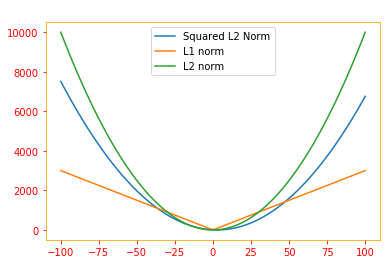

In [ ]:
def SE(x,y,intc,beta):
    return (1./len(x))*(0.5)*sum(y - beta * x - intc)**2

def L1(intc,beta,lam):
    return lam*(tf.abs(intc) + tf.abs(beta))

def L2(intc,beta,lam):
    return lam*(intc**2 + beta**2)

N = 100
x = np.random.randn(N)
y = 2 * x + np.random.randn(N)

beta_N = 100
beta = tf.linspace(-100., 100., beta_N)
intc = 0.0

SE_array = np.array([SE(x,y,intc,i) for i in beta])
L1_array = np.array([L1(intc,i,lam=30) for i in beta])
L2_array = np.array([L2(intc,i,lam=1) for i in beta])

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(beta, SE_array, label='Squared L2 Norm')
ax1.plot(beta, L1_array, label='L1 norm')
ax1.plot(beta, L2_array, label='L2 norm')
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
plt.title('The graph of each of the norms', color='w')
plt.legend()
fig1.show()

One other norm that commonly arises in machine learning is the $L^{\infty}$ norm, also known as the __max norm__. This norm simplifies to the absolute value of the element with the largest magnitude in the vector,

$$\color{Orange}{\parallel x \parallel_{\infty} = max_i |x_i| \tag{15}}$$

If we wish to measure the size of a matrix, in context of deep learning, the most common way to do this is with the __Frobenius norm__:

$$\color{Orange}{\parallel A \parallel_F = \sqrt{\displaystyle\sum_{i, j} A^2_{i, j}} \tag{16}}$$

which is analogous to the $L^{2}$ norm of a vector.

Meaning for example for a matrix:

$$
A =
\begin{pmatrix}
2 & -1 & 5 \\
0 & 2 & 1 \\
3  & 1 & 1  \\
\end{pmatrix}
$$
 
$||A|| = [2^2 + (-1^2) + 5^2 + 0^2 + 2^2 + 1^2 + 3^2 + 1^2 + 1^2]^{1/2}$


In [ ]:
n_matrix_A = tf.constant([[2, -1, 5], [0, 2, 1], [3, 1, 1]], name="matrix_A", dtype=tf.float32)

# Frobenius norm for matrix calculated by setting ord='fro'
frobenius_norm = tf.norm(n_matrix_A, ord='fro', axis=(0, 1))
print("Frobenius norm: {}".format(frobenius_norm))

Frobenius norm: 6.78233003616333



The dot product of two vectors can be rewritten in terms of norms as:

$$\color{Orange}{x^{\top} y = ||x||_2 ||y||_2 cos\theta \tag{17}}$$

where $\theta$ is the angle between $x$ and $y$.

Dot Product can be rewritten in terms of norms, where 

RHS: 4.0 
LHS: [[4.]]


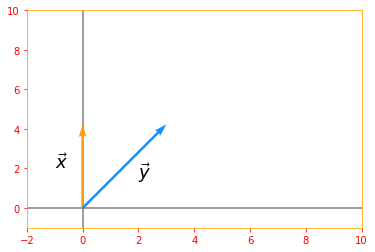

In [ ]:
# for x(0, 2) and y(2, 2) cos theta = 45 degrees
n_vector_x = tf.constant([[0], [2]], dtype=tf.float32, name="vectorX")
n_vector_y = tf.constant([[2], [2]], dtype=tf.float32, name="vectorY")

# Due to pi being in, we won't get an exact value so we are rounding our final value
prod_RHS = tf.round(tf.multiply(tf.multiply(tf.norm(n_vector_x), tf.norm(n_vector_y)), tf.cos(np.pi/4)))
prod_LHS = tf.tensordot(tf.transpose(n_vector_x), n_vector_y, axes=1, name="LHS")

predictor = tf.equal(prod_RHS, prod_LHS)
def true_print(): print("""Dot Product can be rewritten in terms of norms, where \n
RHS: {} \nLHS: {}""".format(prod_RHS, prod_LHS))

def false_print(): print("""Dot Product can not be rewritten in terms of norms, where \n
RHS: {} \nLHS: {}""".format(prod_RHS, prod_LHS))
    
tf.cond(predictor, true_print, false_print)

origin=[0,0]
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
plt.xlim(-2, 10)
plt.ylim(-1, 10)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)
plt.text(-1, 2, r'$\vec{x}$', size=18)
plt.text(2, 1.5, r'$\vec{y}$', size=18)
plt.quiver(*origin, n_vector_x, n_vector_y, color=['#FF9A13','#1190FF'], scale=8)
plt.show()